## Observations and Insights 

#### 1. Based on the boxplot, the efficacy of Infubinol and Ceftamin is better than Capomulin and Ramicane.
#### 2. For every drug regimen, similar amounts of mice were used for the study.
#### 3. Simlar amounts of male and female mice were used in the study.
#### 4. Bigger mice usually have larger tumor sizes. 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results,on= 'Mouse ID', how='outer')
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
df.shape

(1893, 8)

In [61]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [62]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df['Mouse ID_timepoint'] = df['Mouse ID']+'_'+df['Timepoint'].astype(str)

In [63]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df['Mouse ID_timepoint'].duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID_timepoint
909,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
911,g989,Propriva,Female,21,26,5,47.570392,0,g989_5
913,g989,Propriva,Female,21,26,10,49.880528,0,g989_10
915,g989,Propriva,Female,21,26,15,53.442020,0,g989_15
917,g989,Propriva,Female,21,26,20,54.657650,1,g989_20


In [64]:
# check the Mouse ID with duplicated timepoint
df['Mouse ID'].loc[df['Mouse ID_timepoint'].duplicated()].unique()

array(['g989'], dtype=object)

In [65]:
#another method to get the duplicated rows without creating the new column
df['Mouse ID'].loc[df.duplicated(subset=['Mouse ID','Timepoint'])].unique()

array(['g989'], dtype=object)

In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403_0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403_5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403_10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403_15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403_20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969_25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969_30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969_35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969_40


In [67]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_gp = clean_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tv_mean_ds = regimen_gp['Tumor Volume (mm3)'].mean()
tv_median_ds = regimen_gp['Tumor Volume (mm3)'].median()
tv_var_ds = regimen_gp['Tumor Volume (mm3)'].var()
tv_std_ds = regimen_gp['Tumor Volume (mm3)'].std()
tv_sem_ds = regimen_gp['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
TV_df = pd.concat([tv_mean_ds,tv_median_ds,tv_var_ds,tv_std_ds,tv_sem_ds],axis = 1)

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
TV_df.columns = ['mean (tumor volume)','median (tumor volume)','var (tumor volume)','std (tumor volume)','sem (tumor volume)']
TV_df

,mean (tumor volume),median (tumor volume),var (tumor volume),std (tumor volume),sem (tumor volume)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [70]:
# Using the aggregation method, produce the same summary statistics in a single line
TV_df2 = regimen_gp['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
TV_df2.columns = ['mean (tumor volume)','median (tumor volume)','var (tumor volume)','std (tumor volume)','sem (tumor volume)']
TV_df2

,mean (tumor volume),median (tumor volume),var (tumor volume),std (tumor volume),sem (tumor volume)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

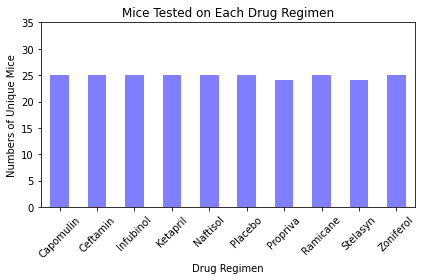

In [71]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_metadata_clean =  mouse_metadata.loc[mouse_metadata['Mouse ID'] != 'g989']
mouse_metadata_clean
bar_ds = mouse_metadata_clean.groupby('Drug Regimen')['Mouse ID'].count()
bar_df = pd.DataFrame(bar_ds)
bar_df.plot.bar(y='Mouse ID',color = 'blue',alpha = 0.5, legend=False) #https://stackoverflow.com/questions/20865487/pandas-plot-without-a-legend
plt.ylim(0,max(bar_ds)+10)
plt.xticks(rotation = 45)
plt.xlabel('Drug Regimen')
plt.ylabel('Numbers of Unique Mice')
plt.title('Mice Tested on Each Drug Regimen')
plt.tight_layout()
plt.show()

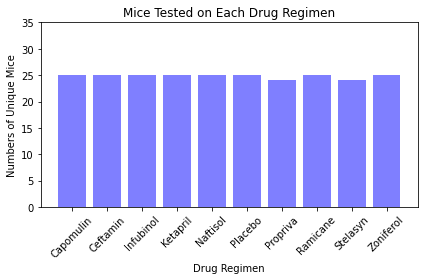

In [72]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(bar_df.index,bar_df['Mouse ID'],color = 'blue',alpha = 0.5)
plt.ylim(0,max(bar_ds)+10)
plt.xticks(rotation = 45)
plt.xlabel('Drug Regimen')
plt.ylabel('Numbers of Unique Mice')
plt.title('Mice Tested on Each Drug Regimen')
plt.tight_layout()
plt.show()

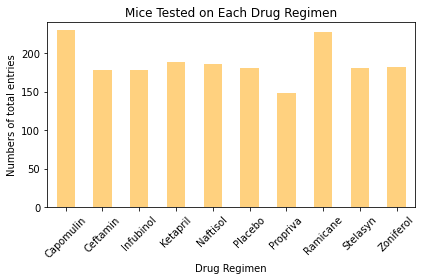

In [73]:
# Generate a bar plot showing the total entries tested on each drug regimen using pandas.(which matched the chart provided by TA)
bar_ds = clean_df.groupby('Drug Regimen')['Mouse ID'].count()
bar_df = pd.DataFrame(bar_ds)
bar_df.plot.bar(y='Mouse ID',color = 'orange',alpha = 0.5, legend=False)
plt.ylim(0,max(bar_ds)+10)
plt.xticks(rotation = 45)
plt.xlabel('Drug Regimen')
plt.ylabel('Numbers of total entries')
plt.title('Mice Tested on Each Drug Regimen')
plt.tight_layout()
plt.show()

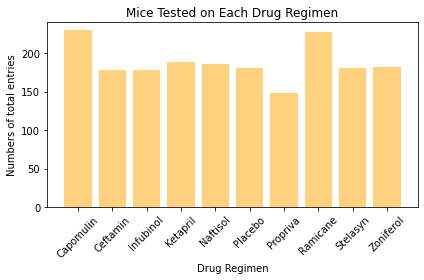

In [74]:
# Generate a bar plot showing the total entries tested on each drug regimen using pyplot.(which matched the chart provided by TA)
plt.bar(bar_df.index,bar_df['Mouse ID'],color = 'orange',alpha = 0.5)
plt.ylim(0,max(bar_ds)+10)
plt.xticks(rotation = 45)
plt.xlabel('Drug Regimen')
plt.ylabel('Numbers of total entries')
plt.title('Mice Tested on Each Drug Regimen')
plt.tight_layout()
plt.show()

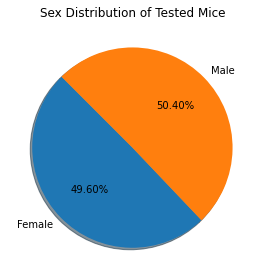

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_df = pd.DataFrame(mouse_metadata_clean.groupby('Sex')['Mouse ID'].count())
pie_df.plot.pie(y='Mouse ID',startangle = 135,autopct = '%.2f%%', legend=False,shadow = True)
plt.title('Sex Distribution of Tested Mice')
plt.ylabel('')
plt.tight_layout()
plt.show()

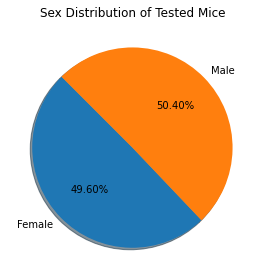

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_df['Mouse ID'],labels = pie_df.index, startangle = 135,autopct = '%.2f%%', shadow = True)
plt.title('Sex Distribution of Tested Mice')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
focus_df = clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])] #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html
# Start by getting the last (greatest) timepoint for each mouse
max_df = pd.DataFrame(focus_df.groupby('Mouse ID')['Timepoint'].max())
max_df = max_df.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
focus_df2 = focus_df.merge(max_df,on='Mouse ID',how='outer')
last_df = focus_df2.loc[focus_df2['Timepoint_x']==focus_df2['Timepoint_y']]
last_df.set_index('Mouse ID',inplace = True)
last_df[['Drug Regimen','Tumor Volume (mm3)']]
#Dez's method: focus_df.groupby(['Drug Regimen','Mouse ID']).aggregate(Tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1]))

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
k403,Ramicane,22.050126
s185,Capomulin,23.343598
x401,Capomulin,28.484033
m601,Capomulin,28.430964
g791,Ramicane,29.128472
...,...,...
x822,Ceftamin,61.386660
y163,Infubinol,67.685569
y769,Ceftamin,68.594745


In [78]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list= ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tv_list=[]
for regimen in regimen_list:
    tv_list.append(list(last_df['Tumor Volume (mm3)'].loc[last_df['Drug Regimen']==regimen]))
tv_list
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

for i in range(4):
    quartiles = last_df['Tumor Volume (mm3)'].loc[last_df['Drug Regimen']==regimen_list[i]].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    upper_bound = upperq+1.5*iqr
    lower_bound = lowerq-1.5*iqr
    if (max(tv_list[i])>upper_bound)or(min(tv_list[i])<lower_bound):
        print(regimen_list[i]+" has (an) outlier(s)." )
    else:
        print(regimen_list[i]+" has no outlier." )


Capomulin has no outlier.
Ramicane has no outlier.
Infubinol has (an) outlier(s).
Ceftamin has no outlier.


In [79]:
max(tv_list[0])

47.68596303

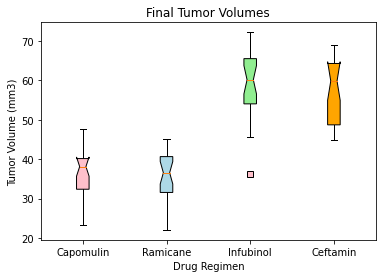

In [80]:
colors = ['pink', 'lightblue', 'lightgreen','orange']
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for i in range(4):
    plt.boxplot(tv_list[i],positions = [i],notch=True,flierprops=dict(markerfacecolor=colors[i-2], marker='s'),boxprops=dict(facecolor=colors[i]), patch_artist=True)
import numpy as np
x_axis = np.arange(len(regimen_list))
tick_locations = [value for value in x_axis]
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Final Tumor Volumes')
plt.xticks(tick_locations, regimen_list)
plt.show()

## Line and Scatter Plots

In [81]:
capomulin_df = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
capomulin_df['Mouse ID'].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

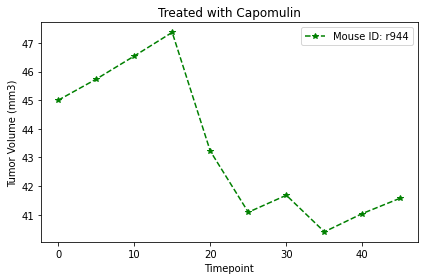

In [82]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
def capomulin_line(Mouse_ID):
    m_capomulin_df = capomulin_df.loc[capomulin_df['Mouse ID']==Mouse_ID]
    m_capomulin_df.plot.line(x='Timepoint',y='Tumor Volume (mm3)',marker = '*',linestyle = 'dashed',color='green',label= 'Mouse ID: ' +Mouse_ID)
    plt.ylabel('Tumor Volume (mm3)')
    plt.legend(loc='best')
    plt.title('Treated with Capomulin')
    plt.tight_layout()
    plt.show()
capomulin_line('r944')

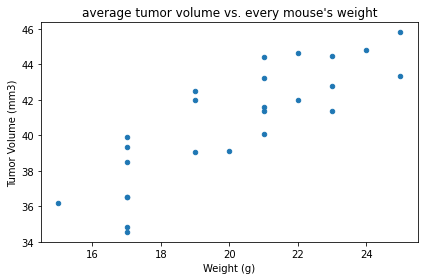

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen the scatter for average tumor volume vs. the scatter for average tumor volume vs. every mouse's weight )
capomulin_tvAndw_df2 = capomulin_df.groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()
capomulin_tvAndw_df2.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')
plt.title("average tumor volume vs. every mouse's weight")
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation (r-value) between mouse weight and the average tumor volume is: 0.84


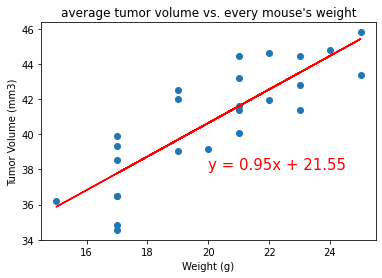

In [84]:
from scipy.stats import linregress
x_values = capomulin_tvAndw_df2['Weight (g)']
y_values = capomulin_tvAndw_df2['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.ylabel('Tumor Volume (mm3)')
plt.title("average tumor volume vs. every mouse's weight")
print(f"The correlation (r-value) between mouse weight and the average tumor volume is: {round(rvalue,2)}")
plt.show()